
## Mining Tweets

In [1]:
from social_miner.twitter import read_tweets, dump_tweets
import pandas as pd

In [2]:
# dump_tweets(account="LouisVuitton", limit=None)

### Exploring Tweets

In [58]:
lv_tweets = read_tweets(account="LouisVuitton", limit=1000)

In [59]:
lv_tweets[0].keys()

dict_keys(['_id', 'text', 'id', 'created_at', 'public_metrics', 'user_metrics', 'retweeters'])

### Normalización de Tweets

In [60]:
tweets_columns = ["id", "text", "user_metrics", "public_metrics", "created_at"]

tweets_data = [{k: t[k] for k in tweets_columns} for t in lv_tweets]

tweets_df = pd.json_normalize(tweets_data).rename(columns={"id": "tweet_id"})
tweets_df.head(1)

,tweet_id,text,created_at,user_metrics.followers_count,user_metrics.following_count,user_metrics.tweet_count,user_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,1491396464450355207,A mingle of tradition and modernity. Gathered ...,2022-02-09 13:00:00,9263006,5,7045,10151,34,2,626,2


In [61]:
retweeters_columns = ["id", "retweeters"]

retweets_data = [{k: t[k] for k in retweeters_columns} for t in lv_tweets]

retweets_df = pd.DataFrame()

for t in retweets_data:
    r_df = pd.json_normalize(t["retweeters"]).rename(columns={"id": "user_id"})
    columns = list(r_df.columns)
    r_df["tweet_id"] = t["id"]
    r_df = r_df[["tweet_id"]+columns]
    retweets_df = retweets_df.append(r_df)

retweets_df.head(10)

,tweet_id,username,verified,name,user_id,description,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,entities.description.urls,entities.description.hashtags,entities.url.urls,entities.description.mentions,entities.description.cashtags
0,1491396464450355207,TAKISHITAMICHI1,False,MICHIAKI,1.113026e+18,https://t.co/xaItcEcaWf,234.0,230.0,1203.0,1.0,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
1,1491396464450355207,vlaNascimento,False,@VLN.,1.439953e+18,"Designer ✍:/Comentários (Moda, Beleza,Celebrid...",20.0,450.0,821.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1491396464450355207,jessy_Annis,False,Jessy Annisa,1.474059e+18,Real estate and sales of medical equipment com...,57.0,48.0,167.0,0.0,NaN,"[{'start': 105, 'end': 112, 'tag': 'Thanks'}]",NaN,NaN,NaN
3,1491396464450355207,Lylasmom10,False,AnastaciaMarie Combs,2.059970e+08,,1919.0,3643.0,16535.0,8.0,NaN,NaN,NaN,NaN,NaN
4,1491396464450355207,LVMH,True,LVMH,5.586061e+08,Official account of the LVMH Group | World lea...,172787.0,56.0,16415.0,1206.0,NaN,NaN,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN
5,1491396464450355207,cocoa_key,False,ライトくん🌬🌙,5.168179e+08,『君を守る光になる』 I'm from fust for you ain dreams / ...,910.0,2229.0,210767.0,132.0,NaN,NaN,NaN,NaN,NaN
6,1491396464450355207,Theoldmc1,False,Theoldmc,1.078535e+18,I'm just a fan. 🇵🇭\n#Fanpage #kpop #Ppop #Mult...,110.0,223.0,307645.0,1.0,NaN,"[{'start': 19, 'end': 27, 'tag': 'Fanpage'}, {...",NaN,NaN,NaN
7,1491396464450355207,ayaya619,False,あやや,2.390074e+08,ジャニーズ大好き,20.0,77.0,616.0,0.0,NaN,NaN,NaN,NaN,NaN
8,1491396464450355207,ro64lima,False,dada,7.742624e+17,Only Army 💜 Just for U BTS\n 🇰🇷( ◜‿◝ )♡🇧🇷,1803.0,2020.0,40125.0,22.0,NaN,NaN,NaN,NaN,NaN
9,1491396464450355207,Mvura_mvur,False,Mvura,1.446117e+18,lexusgatavia on Instagram.,21.0,55.0,184.0,0.0,NaN,NaN,NaN,NaN,NaN


In [62]:
from social_miner.pipeline import (
    preprocess,
    get_hashtags,
    tag_tokens,
    get_keywords,
    get_noun_phrases,
    processing_pipeline
)

In [63]:
tweets_df["hashtags"] = tweets_df["text"].apply(lambda x: get_hashtags(x))
tweets_df["hashtags"]

0                               [LouisVuitton]
1                               [LouisVuitton]
2                               [LouisVuitton]
3                       [LVVolt, LouisVuitton]
4                       [LVVolt, LouisVuitton]
                        ...                   
995                    [LVGifts, LouisVuitton]
996    [LVGifts, AliciaVikander, LouisVuitton]
997                                 [LVCruise]
998                     [LeaSeydoux, LVCruise]
999                                 [LVCruise]
Name: hashtags, Length: 1000, dtype: object

In [64]:
tweets_df["preprocessed"] = tweets_df["text"].apply(lambda x: preprocess(x))
tweets_df["preprocessed"]

0      [a, mingle, of, tradition, and, modernity, gat...
1      [a, welcoming, surprise, in, the, perfectly, m...
2      [a, showcase, of, creativity, and, expertise, ...
3      [powerful, forms, the, lvvolt, fine, jewelry, ...
4      [graphic, abstractions, the, lvvolt, fine, jew...
                             ...                        
995    [a, sense, of, wonder, louisvuitton, honors, t...
996    [thinking, ahead, aliciavikander, welcomes, th...
997    [an, alliance, of, suits, for, lvcruise, nicol...
998    [no, bluffing, leaseydoux, models, pieces, fro...
999    [leading, hand, léa, seydoux, wears, nicolas, ...
Name: preprocessed, Length: 1000, dtype: object

In [65]:
tweets_df["tagged"] = tweets_df["preprocessed"].apply(lambda x: tag_tokens(x))
tweets_df["tagged"]

0      [(a, DT), (mingle, NN), (of, IN), (tradition, ...
1      [(a, DT), (welcoming, VBG), (surprise, NN), (i...
2      [(a, DT), (showcase, NN), (of, IN), (creativit...
3      [(powerful, JJ), (forms, NNS), (the, DT), (lvv...
4      [(graphic, JJ), (abstractions, NNS), (the, DT)...
                             ...                        
995    [(a, DT), (sense, NN), (of, IN), (wonder, NN),...
996    [(thinking, VBG), (ahead, RB), (aliciavikander...
997    [(an, DT), (alliance, NN), (of, IN), (suits, N...
998    [(no, DT), (bluffing, NN), (leaseydoux, NN), (...
999    [(leading, JJ), (hand, NN), (léa, NN), (seydou...
Name: tagged, Length: 1000, dtype: object

In [66]:
tweets_df["keywords"] = tweets_df["tagged"].apply(lambda x: get_keywords(x))
tweets_df["keywords"]

0      [mingle, tradition, modernity, majestic, châte...
1      [surprise, gardens, château, voisins, louisvui...
2      [showcase, creativity, expertise, louisvuitton...
3      [powerful, forms, lvvolt, fine, jewelry, colle...
4      [graphic, abstractions, lvvolt, fine, jewelry,...
                             ...                        
995    [sense, wonder, louisvuitton, essence, season,...
996    [aliciavikander, festive, season, behalf, loui...
997    [alliance, suits, lvcruise, nicolas, ghesquièr...
998    [bluffing, leaseydoux, models, pieces, nicolas...
999    [leading, hand, léa, seydoux, nicolas, ghesqui...
Name: keywords, Length: 1000, dtype: object

In [67]:
tweets_df["noun_phrases"] = tweets_df["tagged"].apply(lambda x: get_noun_phrases(x))
tweets_df["noun_phrases"]

0      [a mingle, the majestic château, the ingenious...
1             [the château, the extent, the savoirfaire]
2      [a showcase, a collection, the extraordinary s...
3      [the lvvolt fine jewelry, the energy, energeti...
4      [the lvvolt fine jewelry, a universal language...
                             ...                        
995        [a sense, the essence, the season, a journey]
996                [the festive season, the new holiday]
997                  [an alliance, the dauphine, a card]
998            [no bluffing, playful lvcruise, the card]
999    [leading hand, playful lvcruise collection, a ...
Name: noun_phrases, Length: 1000, dtype: object

In [68]:
tweets_df

,tweet_id,text,created_at,user_metrics.followers_count,user_metrics.following_count,user_metrics.tweet_count,user_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,hashtags,preprocessed,tagged,keywords,noun_phrases
0,1491396464450355207,A mingle of tradition and modernity. Gathered ...,2022-02-09 13:00:00,9263006,5,7045,10151,34,2,626,2,[LouisVuitton],"[a, mingle, of, tradition, and, modernity, gat...","[(a, DT), (mingle, NN), (of, IN), (tradition, ...","[mingle, tradition, modernity, majestic, châte...","[a mingle, the majestic château, the ingenious..."
1,1491336076128100356,A welcoming surprise. In the perfectly manicur...,2022-02-09 09:00:02,9263006,5,7045,10151,42,1,552,1,[LouisVuitton],"[a, welcoming, surprise, in, the, perfectly, m...","[(a, DT), (welcoming, VBG), (surprise, NN), (i...","[surprise, gardens, château, voisins, louisvui...","[the château, the extent, the savoirfaire]"
2,1491071823873671169,A showcase of creativity and expertise. #Louis...,2022-02-08 15:30:00,9263006,5,7045,10151,77,11,1128,2,[LouisVuitton],"[a, showcase, of, creativity, and, expertise, ...","[(a, DT), (showcase, NN), (of, IN), (creativit...","[showcase, creativity, expertise, louisvuitton...","[a showcase, a collection, the extraordinary s..."
3,1490415013668044809,Powerful forms. The #LVVolt Fine Jewelry Colle...,2022-02-06 20:00:04,9263006,5,7045,10151,93,10,1490,9,"[LVVolt, LouisVuitton]","[powerful, forms, the, lvvolt, fine, jewelry, ...","[(powerful, JJ), (forms, NNS), (the, DT), (lvv...","[powerful, forms, lvvolt, fine, jewelry, colle...","[the lvvolt fine jewelry, the energy, energeti..."
4,1490233847555973125,Graphic abstractions. The #LVVolt Fine Jewelry...,2022-02-06 08:00:11,9263006,5,7045,10151,71,11,1138,4,"[LVVolt, LouisVuitton]","[graphic, abstractions, the, lvvolt, fine, jew...","[(graphic, JJ), (abstractions, NNS), (the, DT)...","[graphic, abstractions, lvvolt, fine, jewelry,...","[the lvvolt fine jewelry, a universal language..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1330859400710467584,A sense of wonder. #LouisVuitton honors the es...,2020-11-23 13:03:01,9263006,5,7045,10151,40,7,446,2,"[LVGifts, LouisVuitton]","[a, sense, of, wonder, louisvuitton, honors, t...","[(a, DT), (sense, NN), (of, IN), (wonder, NN),...","[sense, wonder, louisvuitton, essence, season,...","[a sense, the essence, the season, a journey]"
996,1330820313752473603,Thinking ahead. #AliciaVikander welcomes the f...,2020-11-23 10:27:42,9263006,5,7045,10151,34,3,520,2,"[LVGifts, AliciaVikander, LouisVuitton]","[thinking, ahead, aliciavikander, welcomes, th...","[(thinking, VBG), (ahead, RB), (aliciavikander...","[aliciavikander, festive, season, behalf, loui...","[the festive season, the new holiday]"
997,1330496270469828608,"An alliance of suits. For #LVCruise, Nicolas G...",2020-11-22 13:00:04,9263006,5,7045,10151,82,12,1001,17,[LVCruise],"[an, alliance, of, suits, for, lvcruise, nicol...","[(an, DT), (alliance, NN), (of, IN), (suits, N...","[alliance, suits, lvcruise, nicolas, ghesquièr...","[an alliance, the dauphine, a card]"
998,1330194301796708355,No bluffing. #LeaSeydoux models pieces from Ni...,2020-11-21 17:00:10,9263006,5,7045,10151,52,7,600,5,"[LeaSeydoux, LVCruise]","[no, bluffing, leaseydoux, models, pieces, fro...","[(no, DT), (bluffing, NN), (leaseydoux, NN), (...","[bluffing, leaseydoux, models, pieces, nicolas...","[no bluffing, playful lvcruise, the card]"


In [69]:
from social_miner.pipeline import generate_wordcloud

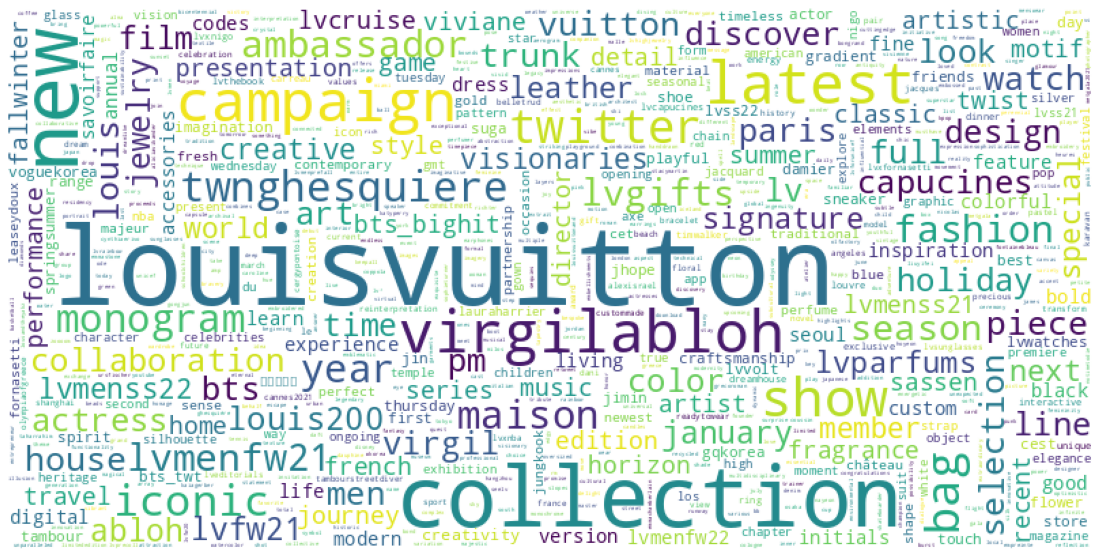

In [70]:
wc = generate_wordcloud(tweets_df, "keywords",)

### 🤔  Make a count of keywords and pick up the top 20

In [71]:
####

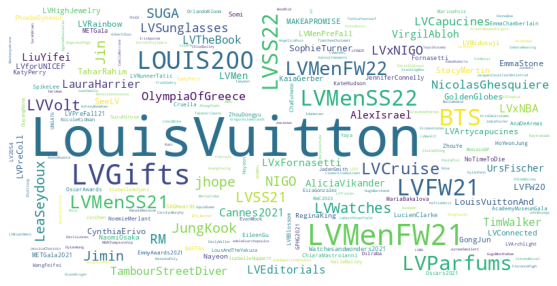

In [72]:
wc = generate_wordcloud(tweets_df, "hashtags", figsize=(10,5))

### 🤔  Make a count of hashtags and pick up the top 20

In [73]:
from social_miner.pipeline import get_verbatims

In [74]:
get_verbatims(tweets_df, text_col="text", keyword="Louis", n=5)

['A mingle of tradition and modernity. Gathered at  the majestic Château de Voisins, the ingenious creativity and craftsmanship of #LouisVuitton’s hard-sided trunks are showcased.',
 'A welcoming surprise. In the perfectly manicured gardens of the Château de Voisins, #LouisVuitton’s hard-sided trunks reveal the extent of the savoir-faire that has continued throughout the centuries until today.',
 'A showcase of creativity and expertise. #LouisVuitton presents a collection of trunks in the extraordinary setting of the Château de Voisins near Paris.',
 'Powerful forms. The #LVVolt Fine Jewelry Collection pulsates with the energy of #LouisVuitton’s initials’ energetic shape. Discover the full line including new white and pink gold versions of the Upside Down bracelet at https://t.co/Z6gKD5KMMx https://t.co/SAWOVCO07a',
 'Graphic abstractions. The #LVVolt Fine Jewelry Collection creates a universal language out of #LouisVuitton’s iconic initials. Discover the full line including new white 

### Sintagmas nominales

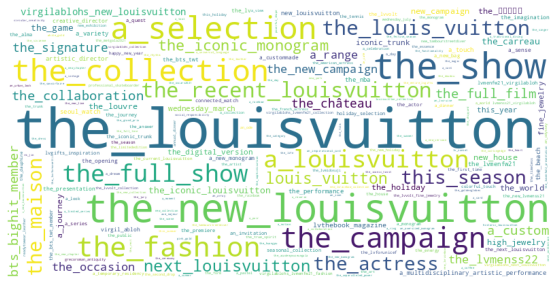

In [75]:
wc = generate_wordcloud(tweets_df, "noun_phrases", figsize=(10,5))

### 🤔 Detecnting trends in time series

In [76]:
tweets_df["created_at"].iloc[0]

Timestamp('2022-02-09 13:00:00')

In [77]:
tweets_ts = tweets_df.set_index(["created_at"])
tweets_ts.head(1)

,tweet_id,text,user_metrics.followers_count,user_metrics.following_count,user_metrics.tweet_count,user_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,hashtags,preprocessed,tagged,keywords,noun_phrases
created_at,,,,,,,,,,,,,,,
2022-02-09 13:00:00,1491396464450355207,A mingle of tradition and modernity. Gathered ...,9263006,5,7045,10151,34,2,626,2,[LouisVuitton],"[a, mingle, of, tradition, and, modernity, gat...","[(a, DT), (mingle, NN), (of, IN), (tradition, ...","[mingle, tradition, modernity, majestic, châte...","[a mingle, the majestic château, the ingenious..."


In [97]:
import numpy as np 
metrics_cols = [c for c in list(tweets_df.columns) if "public_metrics" in c]

dt = tweets_ts[metrics_cols].rename(
    columns={
        c: c.replace("public_metrics.", "") for c in metrics_cols
    }
)

dt["n_tweets"] = 1

dt = dt.resample("D").sum().reset_index().rename(columns={"created_at": "date"})
dt

,date,retweet_count,reply_count,like_count,quote_count,n_tweets
0,2020-11-21,103,22,1328,8,2
1,2020-11-22,82,12,1001,17,1
2,2020-11-23,127,13,1597,8,4
3,2020-11-24,252,14,2642,34,5
4,2020-11-25,104,7,1207,15,3
...,...,...,...,...,...,...
441,2022-02-05,178,21,2872,17,2
442,2022-02-06,164,21,2628,13,2
443,2022-02-07,0,0,0,0,0
444,2022-02-08,77,11,1128,2,1


In [98]:
import plotly.express as px

fig = px.line(
    dt,
    x="date",
    y=list(dt.columns)[1:],
    log_y=False
)
fig.show()

## Mining Facebook

In [25]:
from social_miner.facebook import read_posts, dump_posts

In [26]:
# dump_posts(account="LouisVuitton", limit=None)

In [27]:
lv_posts = read_posts(account="LouisVuitton", limit=10)

In [28]:
lv_posts[0].keys()

dict_keys(['_id', 'text', 'post_text', 'shared_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live'])

In [35]:
import re 

def get_hashtags(text):
    hashtags = re.findall(
        pattern=r"#(\w+)",
        string=text
    )
    return hashtags

In [36]:
get_hashtags("#HelloWorld")


['HelloWorld']

In [37]:
posts_df["hashtags"] = posts_df.apply(
    lambda x: get_hashtags(x["text"]),
    axis=1
)

In [38]:
posts_df["hashtags"]

0                                        [LouisVuitton]
1                                        [LouisVuitton]
2                                        [LouisVuitton]
3                                [LVVolt, LouisVuitton]
4                                [LVVolt, LouisVuitton]
                            ...                        
95                  [Jin, LouisVuitton, LVMenSS22, BTS]
96                   [RM, LouisVuitton, LVMenSS22, BTS]
97    [LouisVuitton, LVMenSS22, BTS, RM, Jin, SUGA, ...
98    [LouisVuitton, LVMenSS22, BTS, RM, Jin, SUGA, ...
99                            [LouisVuitton, LVTheBook]
Name: hashtags, Length: 100, dtype: object